# 과제 설명
1. 코드 내 ### 1 ###, ### 2 ### 과 같은 빈칸을 채우고 보고서에 해당 코드에 대해 설명하기 - 8개
2. 보고서에 #[1. 질문]# 의 질문에 대한 답변 설명하기 - 2개

보고서는 1장 내로 적어주세요

In [ ]:
import torch.nn as nn

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()

        self.network = nn.Sequential(
            nn.Flatten(), ### 1 ### 현재 이미지 데이터의 shape는 (64, 1, 28, 28)로 구성되어 있다.허나, single perceptron에서 input은 (batch size, n) 이런 구조이므로 1*28*28을 해줘야한다.
            nn.Linear(28 * 28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10),
        )
    
    def forward(self, inputs):
        return self.network(inputs)

In [ ]:
import torch
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import datasets, transforms ### 2 ### transforms / torchvision, torchaudio, torchtext 이렇게 3개의 데이터를 주로 사용하는데, 이것은 모두 datasets라는 라이브러리에 저장되어 있다.
from tqdm import tqdm

def train(configs):
    # Dataset
    train_dataset = datasets.MNIST(
        root=configs['root'],
        train=True,
        transform=transforms.ToTensor(),
        download=True
    )
    val_dataset = datasets.MNIST(
        root=configs['root'],
        train=False,
        transform=transforms.ToTensor(),
        download=True
    )

    # DataLoader
    train_dataloader = DataLoader(
        dataset=train_dataset,
        batch_size=configs['batch_size'],
        shuffle=True,
    )
    val_dataloader = DataLoader(
        dataset=val_dataset,
        batch_size=configs['batch_size'],
        shuffle=False,
    )

    for inputs, labels in train_dataloader:
        print(f'Inputs : {inputs.shape}')
        print(f'Labels : {labels.shape}')
        break
    
    # Model
    net = NeuralNetwork()

    # Loss Fuction
    criterion = nn.CrossEntropyLoss(reduction='sum')

    # Optimizer
    optimizer = optim.SGD(params=net.parameters(), lr=1e-3) ### 3 ###, lr=1e-3)

    # Device
    device = 'cuda' if torch.cuda.is_available() else 'cpu'
    print(f'Device : {device}')

    net = net.to(device)
    
    best_eval_loss = 1000

    for epoch in range(configs['epochs']):
        print(f'Epoch : {epoch + 1} ==============================')
        
        # Train
        net.train()
        train_loss = 0.0
        for inputs, labels in tqdm(train_dataloader):
            inputs, labels = inputs.to(device), labels.to(device) ### 4 ###
            # 1. Forward
            outputs = net(inputs) ### 5 ###
            # 2. Compute Loss
            loss = criterion(outputs, labels)
            # 3. Backward
            loss.backward() ### 6 ###
            # 4. Gradient Descent
            optimizer.step()
            # 5. Gradient Intialization
            optimizer.zero_grad() ### 7 ###

            train_loss += loss.item()

        train_loss = train_loss / 60000.0
        print(f'Train Loss : {train_loss}')

        net.eval()
        eval_loss = 0.0
        for inputs, labels in tqdm(val_dataloader):
            inputs, labels = inputs.to(device), labels.to(device) ### 4 ###
            
            #[1. 85번째 줄 코드가 필요한 이유는 무엇일까요?]# 마지막으로 evaluation을 할 때에는 gradient를 계산하고 저장하여 학습을 하는 것이 아니기 때문에, gradient를 따로 저장할 필요가 없다고 설정하는 것임.
            with torch.no_grad():
                # Forward
                outputs = net(inputs)
                # Compute Loss
                loss = criterion(outputs, labels)

            eval_loss += loss.item()
        
        eval_loss = eval_loss / 10000.0
        print(f'Eval Loss : {eval_loss}')

        #[2. 96~98번째 줄 코드가 필요한 이유는 무엇일까요?]# 학습을 진행하다보면, loss 값이 끊임없이 줄어들다가 증가한다. 이때, overfitting에 의한 loss 값의 증가로 overfitting이 되기 전, loss 값이 줄어들다 증가하는 구간이 training epoch의 최적값이므로 이 값을 저장해야한다.
        if best_eval_loss > eval_loss:
            best_eval_loss = eval_loss
            torch.save(net.state_dict(), 'best_model_weight.pth')

In [ ]:
configs = {
    'root': 'data',
    'batch_size': 64,
    'epochs': 20,
}

train(configs)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Inputs : torch.Size([64, 1, 28, 28])
Labels : torch.Size([64])
Device : cuda
Epoch : 1 ==============================


100%|██████████| 938/938 [00:12<00:00, 72.98it/s] 


Train Loss : 0.7197956940412521


100%|██████████| 157/157 [00:00<00:00, 160.58it/s]


Eval Loss : 0.2482410453557968
Epoch : 2 ==============================


100%|██████████| 938/938 [00:06<00:00, 137.54it/s]


Train Loss : 0.20892687755823136


100%|██████████| 157/157 [00:00<00:00, 162.99it/s]


Eval Loss : 0.17073501637279986
Epoch : 3 ==============================


100%|██████████| 938/938 [00:06<00:00, 135.77it/s]


Train Loss : 0.13450355187654495


100%|██████████| 157/157 [00:00<00:00, 162.30it/s]


Eval Loss : 0.11161730052754283
Epoch : 4 ==============================


100%|██████████| 938/938 [00:06<00:00, 136.00it/s]


Train Loss : 0.09858118880490462


100%|██████████| 157/157 [00:01<00:00, 151.43it/s]


Eval Loss : 0.09947466300651431
Epoch : 5 ==============================


100%|██████████| 938/938 [00:06<00:00, 135.26it/s]


Train Loss : 0.07601041695773601


100%|██████████| 157/157 [00:00<00:00, 157.99it/s]


Eval Loss : 0.08239545377902686
Epoch : 6 ==============================


100%|██████████| 938/938 [00:06<00:00, 137.61it/s]


Train Loss : 0.060313949682811896


100%|██████████| 157/157 [00:00<00:00, 160.96it/s]


Eval Loss : 0.08023071427196264
Epoch : 7 ==============================


100%|██████████| 938/938 [00:06<00:00, 135.90it/s]


Train Loss : 0.04852147788902124


100%|██████████| 157/157 [00:00<00:00, 160.26it/s]


Eval Loss : 0.07365662481719627
Epoch : 8 ==============================


100%|██████████| 938/938 [00:06<00:00, 137.07it/s]


Train Loss : 0.0397351725657781


100%|██████████| 157/157 [00:01<00:00, 148.45it/s]


Eval Loss : 0.07572186570107005
Epoch : 9 ==============================


100%|██████████| 938/938 [00:07<00:00, 120.62it/s]


Train Loss : 0.03290935236712297


100%|██████████| 157/157 [00:00<00:00, 160.89it/s]


Eval Loss : 0.07990642639691942
Epoch : 10 ==============================


100%|██████████| 938/938 [00:07<00:00, 123.05it/s]


Train Loss : 0.026139246098697187


100%|██████████| 157/157 [00:00<00:00, 162.61it/s]


Eval Loss : 0.07532512816074305
Epoch : 11 ==============================


100%|██████████| 938/938 [00:06<00:00, 136.61it/s]


Train Loss : 0.020091460001468657


100%|██████████| 157/157 [00:00<00:00, 164.74it/s]


Eval Loss : 0.06466724162750179
Epoch : 12 ==============================


100%|██████████| 938/938 [00:06<00:00, 138.26it/s]


Train Loss : 0.016638696455086272


100%|██████████| 157/157 [00:00<00:00, 162.00it/s]


Eval Loss : 0.06732137778397883
Epoch : 13 ==============================


100%|██████████| 938/938 [00:06<00:00, 136.10it/s]


Train Loss : 0.012959655562974513


100%|██████████| 157/157 [00:00<00:00, 162.65it/s]


Eval Loss : 0.0707954275951779
Epoch : 14 ==============================


100%|██████████| 938/938 [00:06<00:00, 136.15it/s]


Train Loss : 0.009555529759218917


100%|██████████| 157/157 [00:00<00:00, 157.28it/s]


Eval Loss : 0.06470082190797402
Epoch : 15 ==============================


100%|██████████| 938/938 [00:07<00:00, 132.68it/s]


Train Loss : 0.0076259819807639965


100%|██████████| 157/157 [00:01<00:00, 151.57it/s]


Eval Loss : 0.07340315421928535
Epoch : 16 ==============================


100%|██████████| 938/938 [00:06<00:00, 135.23it/s]


Train Loss : 0.005127724794996903


100%|██████████| 157/157 [00:00<00:00, 161.78it/s]


Eval Loss : 0.07014777404102643
Epoch : 17 ==============================


100%|██████████| 938/938 [00:06<00:00, 136.29it/s]


Train Loss : 0.0044276651385705915


100%|██████████| 157/157 [00:00<00:00, 159.71it/s]


Eval Loss : 0.07821637459257617
Epoch : 18 ==============================


100%|██████████| 938/938 [00:06<00:00, 136.70it/s]


Train Loss : 0.0027239307575160636


100%|██████████| 157/157 [00:00<00:00, 160.39it/s]


Eval Loss : 0.0695042870023186
Epoch : 19 ==============================


100%|██████████| 938/938 [00:06<00:00, 136.80it/s]


Train Loss : 0.0019525715924353184


100%|██████████| 157/157 [00:00<00:00, 163.30it/s]


Eval Loss : 0.07118161778661897
Epoch : 20 ==============================


100%|██████████| 938/938 [00:06<00:00, 136.68it/s]


Train Loss : 0.0014994050551011848


100%|██████████| 157/157 [00:00<00:00, 160.70it/s]

Eval Loss : 0.07062800051973808


Label: 4


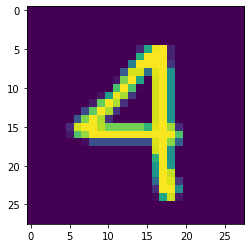

In [ ]:
import random
import matplotlib.pyplot as plt

def Tensor2Image(tensor):
    image = tensor.numpy()
    plt.imshow(image.reshape(28, 28))

n = random.randint(0, 1000)

val_dataset = datasets.MNIST(
    root=configs['root'],
    train=False,
    transform=transforms.ToTensor(),
    download=True
)

test_input, test_label = val_dataset[n]

print(f'Label: {test_label}')
Tensor2Image(test_input)

In [ ]:
# Trained Network
net = NeuralNetwork()
net.load_state_dict(torch.load('best_model_weight.pth')) ### 8 ###
softmax = nn.Softmax(dim=1)

test_output = net(test_input)
test_prob = softmax(test_output)
test_predict = test_prob.argmax()

print(test_output)
print(test_prob)
print(test_predict)

tensor([[-6.2688, -1.7858, -1.0186, -2.2687, 14.9764, -0.9919, -2.8602,  0.1291,
         -3.6768,  4.2209]], grad_fn=<AddmmBackward0>)
tensor([[5.9335e-10, 5.2511e-08, 1.1309e-07, 3.2397e-08, 9.9998e-01, 1.1616e-07,
         1.7931e-08, 3.5636e-07, 7.9246e-09, 2.1326e-05]],
       grad_fn=<SoftmaxBackward0>)
tensor(4)
